In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop(columns=['Exited'])
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
X_train.shape

(8000, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_Scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model=Sequential()

#model.add(Dense(3,activation='sigmoid',input_dim=11))
#model.add(Dense(1,activation='sigmoid'))

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [53]:
history=model.fit(X_train_Scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8673 - val_loss: 0.3534 - val_accuracy: 0.8475
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8667 - val_loss: 0.3523 - val_accuracy: 0.8475
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8680 - val_loss: 0.3519 - val_accuracy: 0.8487
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8694 - val_loss: 0.3509 - val_accuracy: 0.8450
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3265 - accuracy: 0.8669 - val_loss: 0.3530 - val_accuracy: 0.8469
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3269 - accuracy: 0.8694 - val_loss: 0.3523 - val_accuracy: 0.8462
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8692 - val_loss: 0.3514 - val_accuracy: 0.8456

In [48]:
model.layers[0].get_weights()

[array([[-2.47724168e-02, -8.36435705e-02,  2.69248307e-01,
          2.93205053e-01, -3.01878061e-02,  3.31304699e-01,
          7.81808272e-02,  1.61426440e-01, -1.58724487e-01,
          2.28731006e-01, -4.26048599e-02],
        [ 8.37585554e-02, -1.99631289e-01, -1.12515360e-01,
          3.93444598e-01, -6.47026181e-01, -6.98806286e-01,
          2.39238128e-01,  6.73053190e-02, -9.77053821e-01,
         -5.78568161e-01, -1.95387423e-01],
        [ 8.79627094e-03,  1.21418223e-01, -1.73078015e-01,
         -2.40864635e-01,  1.29077300e-01, -1.28249511e-01,
          1.03119597e-01, -2.59579688e-01,  8.92739370e-03,
         -1.37283877e-01, -1.28497243e-01],
        [-5.20188585e-02,  4.60597694e-01, -3.15591902e-01,
         -1.17903896e-01, -2.68063813e-01, -2.62268573e-01,
         -3.19544189e-02,  5.59488058e-01, -1.36751086e-01,
          2.19833434e-01, -6.17210150e-01],
        [ 8.97174299e-01,  4.19137031e-01, -1.77547947e-01,
          8.41269910e-01,  2.69564509e-01, -

In [49]:
model.layers[1].get_weights()

[array([[-0.52521545, -0.87857836, -0.56689084,  0.25876713, -0.90496415,
          0.38369855, -0.6830687 ,  0.62765265, -0.87528425,  0.5450127 ,
         -1.3928146 ],
        [ 0.37014538, -0.44206306, -0.02380968,  0.27794763, -1.6795936 ,
          0.5135687 , -0.00319122,  0.59733856, -0.04051288, -0.05712129,
         -0.3897331 ],
        [ 0.16899216,  0.5155033 ,  0.01533478,  0.6313687 , -1.4576869 ,
         -0.0477588 ,  0.3366973 ,  0.09267064,  0.27979106,  0.35974365,
          0.68279815],
        [-1.6606337 , -0.40771818,  0.71708107, -0.3635119 , -0.8124599 ,
          0.11811813,  0.3868129 ,  0.25906172,  0.02512516,  0.05924814,
         -0.37982917],
        [-0.46648812, -0.29171446,  0.23499478, -0.10450422, -0.47162688,
          0.28718078,  0.31606236, -0.38734   ,  0.54510814,  0.40477458,
         -0.3869341 ],
        [-0.21448177,  0.09325471,  0.24748644, -0.09271895, -0.6347786 ,
         -0.04213092, -0.04179631, -0.46420804,  0.3844545 ,  0.1034079

In [50]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [51]:
y_pred=np.where(y_log>0.5,1,0)

In [38]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

0.865

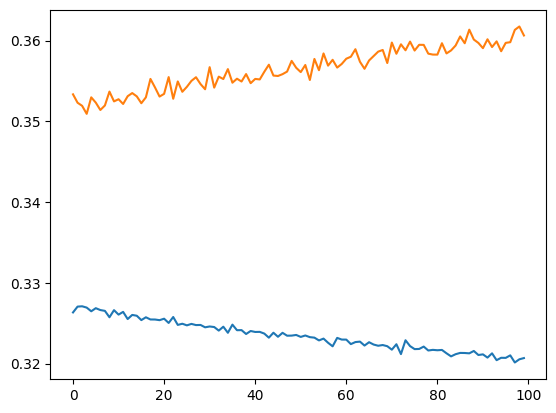

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


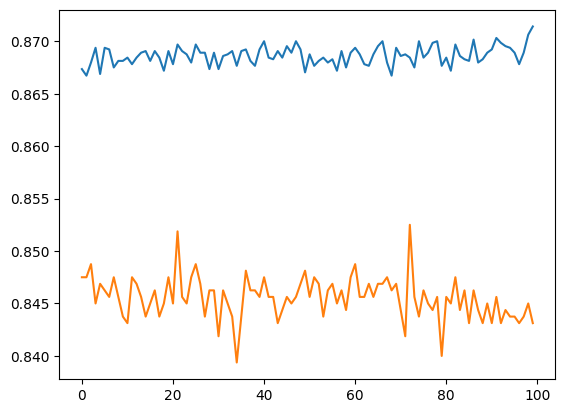

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])